In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
%matplotlib inline


In [4]:
import sys
filepath = '/Users/yitang/Dropbox/Spring2020_SJSU/MATH_253/Project/yalefaces/'
sys.path.append(filepath)

In [5]:
## read the 11 images of the subject 15
files = [file for file in glob.glob(filepath + '*')]
subject15=[]
for i in files:
    if 'subject15' in i:
        subject15.append(i)


In [493]:
A = np.zeros((11, 243, 320)) # create the 3-dimensional array to store the images
for i in range(11):
    img = plt.imread(subject15[i]) # read the gif image
    img_newaxis = img[np.newaxis,:,:] # add the 3rd dimension to the 2D array
    A[i,:,:] = img_newaxis

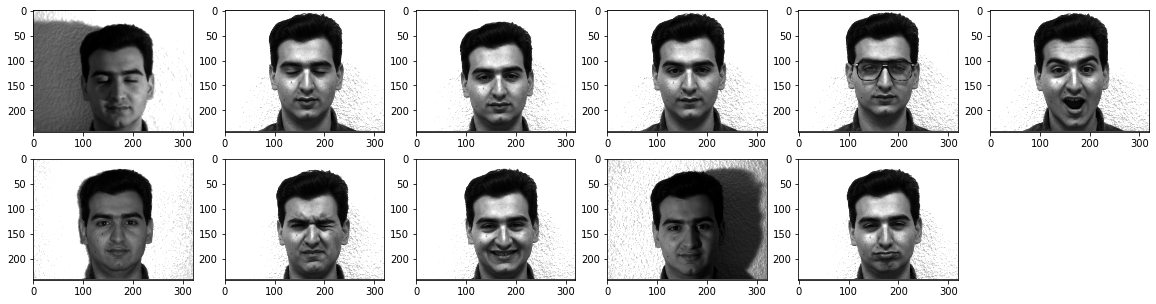

In [494]:
## plot all the images of subject15
fig, ax = plt.subplots(2, 6, figsize = (20, 5))
for i in range(2):
    for j in range(6):
        if 6*i+j <11:
            ax[i,j].imshow(A[6*i+j,:,:], cmap = 'gray')
        else:
            ax[i,j].axis('off')
fig.savefig('Fig1_subject15_all_images.pdf', bbox_inches="tight")

In [495]:
# column vectors of the images
B = np.zeros((11, 320, 243))
for i in range(11):
    img = plt.imread(subject15[i]).T
    img_newaxis = img[np.newaxis, :,:]
    B[i, :,:] = img_newaxis

In [496]:
## 2DPCA implementation
# row vectors of the images
A_bar = np.mean(A, axis = 0) # mean of the total 11 images
M = A.shape[0] # number of image
summation = np.zeros((320, 320))
for i in range(M):
    diff = A[i,:,:]-A_bar
    product = np.matmul(diff.T, diff)
    summation += product
Gt = 1/M*summation # image covariance (scatter) matrix

# column vectors of the images
B_bar = np.mean(B, axis = 0)
N = B.shape[0]
summation_B = np.zeros((243, 243))
for i in range(N):
    diff = B[i,:,:]-B_bar
    product = np.matmul(diff.T, diff)
    summation_B += product
Gt_B = 1/N*summation_B

In [497]:
w,v = np.linalg.eig(Gt) # calculate the eigenvalues and eigenvectors of Gt

w_B, v_B = np.linalg.eig(Gt_B)

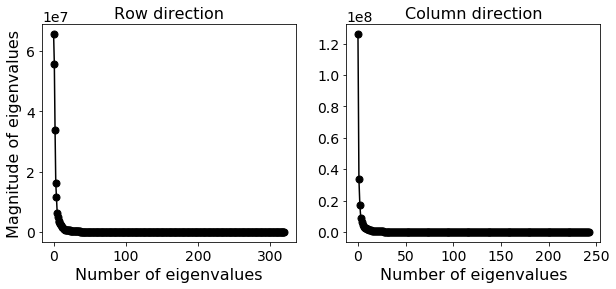

In [498]:
fig, ax = plt.subplots(1, 2, figsize = (10, 4))

ax[0].plot(np.arange(320), w, 'ko-', markersize = 7)
ax[1].plot(np.arange(243), w_B, 'ko-', markersize = 7)
titles = ['Row direction', 'Column direction']
for i in range(2):
    ax[i].tick_params(axis = 'both', which = 'major', labelsize = 14)
    ax[i].yaxis.offsetText.set_fontsize(14)
    ax[i].set_xlabel('Number of eigenvalues', fontsize = 16)
    ax[i].set_title(titles[i], fontsize = 16)
ax[0].set_ylabel('Magnitude of eigenvalues', fontsize = 16)
fig.savefig('Fig2_eigenvalues.pdf', bbox_inches="tight")

In [499]:
# Find the number of eigenvalues needed to capture 95% total variance 
sum = 0 
for i in range(w.shape[0]):
    sum+=w[i]
    percent = sum/np.sum(w)
    if percent > 0.95:
        print(i)
        break

16


In [500]:
# Find the number of eigenvalues needed to capture 95% total variance 
sum = 0 
for i in range(w_B.shape[0]):
    sum+=w_B[i]
    percent = sum/np.sum(w_B)
    if percent > 0.95:
        print(i)
        break

15


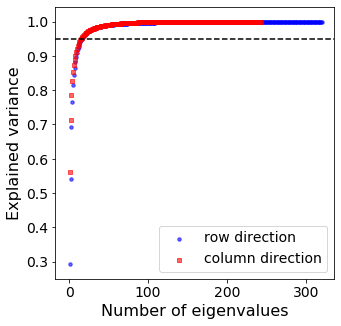

In [501]:
cumu_exp_var_A =[np.sum(w[0:(i+1)])/np.sum(w) for i in range(w.shape[0])]
cumu_exp_var_B = [np.sum(w_B[0:(i+1)])/np.sum(w_B) for i in range(w_B.shape[0])]

fig, ax = plt.subplots(figsize = (5, 5))

ax.scatter(np.arange(1, 321), cumu_exp_var_A, color = 'blue',marker = 'o', s =12, alpha = 0.6, label = 'row direction')
ax.scatter(np.arange(1, 244), cumu_exp_var_B, color = 'red', marker = 's',s = 12, alpha = 0.6, label = 'column direction')
ax.axhline(y = 0.95, ls = '--', color = 'black')
ax.tick_params(axis = 'both', which = 'major', labelsize = 14)
ax.set_xlabel('Number of eigenvalues', fontsize = 16)
ax.set_ylabel('Explained variance', fontsize = 16)
ax.legend(fontsize = 14)

fig.savefig('Fig3_explainedVariances.pdf', bbox_inches = 'tight')

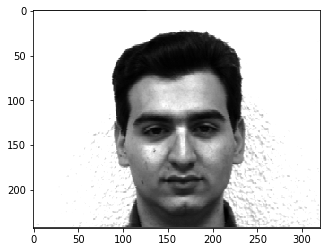

In [502]:
## reconstruct the subject15[2] image for the following analysis

img = plt.imread(subject15[2])

fig, ax = plt.subplots()
ax.imshow(img, cmap = 'gray')

fig.savefig('Fig_subject15_2.pdf', bbox_inches = 'tight')

Text(0, 0.5, '0.5row+0.5col')

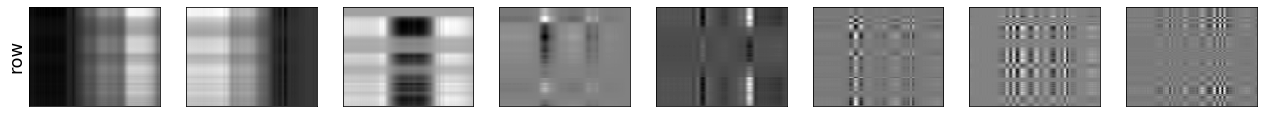

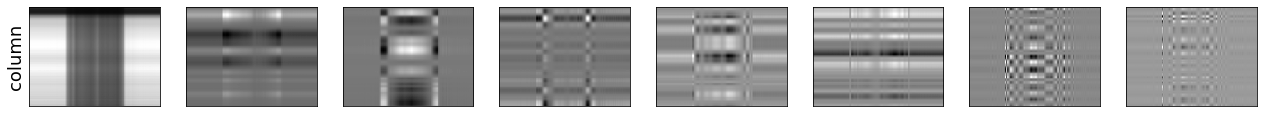

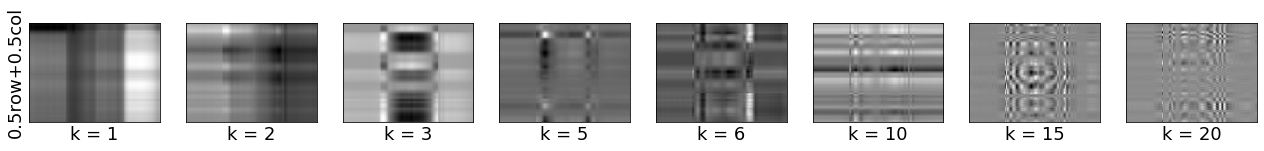

In [503]:
# reconstructed subimages
# row-image
A_tilde_k = {} 
k = [0, 1, 2, 4, 5, 9, 14, 19]
for i in k:
    V1 = np.matmul(A, v[:,i].reshape(320,1))
    A_tilde_k[i] = np.matmul(V1, v[:,i].reshape(320,1).T)
    
# column-image
B_tilde_k = {}
for i in k:
    V2 = np.matmul(B, v_B[:,i].reshape(243,1))
    B_tilde_k[i] = np.matmul(V2, v_B[:,i].reshape(243,1).T)
    
# row-column image
C_tilde_k = {}
for i in k:
    C_tilde_k[i] = 1/2*A_tilde_k[i][2,:,:] + 1/2*B_tilde_k[i][2,:,:].T

fig,ax = plt.subplots(1,8, figsize = (22,2))
for i, j in zip(range(8),k):
    ax[i].imshow(A_tilde_k[j][2,:,:], cmap = 'gray')
    ax[i].tick_params(axis = 'both', which = 'both', 
                      bottom = False, left = False,
                     labelbottom = False,
                     labelleft = False)
ax[0].set_ylabel('row', fontsize = '18')
# fig.savefig('Fig4_subimage_a.pdf', bbox_inches = 'tight')
    
fig,ax = plt.subplots(1,8, figsize = (22,2))
for i, j in zip(range(8),k):
    ax[i].imshow(B_tilde_k[j][2,:,:].T, cmap = 'gray')
    ax[i].tick_params(axis = 'both', which = 'both', 
                      bottom = False, left = False,
                     labelbottom = False,
                     labelleft = False)

ax[0].set_ylabel('column', fontsize = '18')    
# fig.savefig('Fig4_subimage_b.pdf', bbox_inches = 'tight')

fig,ax = plt.subplots(1,8, figsize = (22,2))
for i, j in zip(range(8),k):
    ax[i].imshow(C_tilde_k[j], cmap = 'gray')
    ax[i].tick_params(axis = 'both', which = 'both', 
                      bottom = False, left = False,
                     labelbottom = False,
                     labelleft = False)
    ax[i].set_xlabel('k = ' + str(j+1), fontsize = 18)
ax[0].set_ylabel('0.5row+0.5col', fontsize = '18')
# fig.savefig('Fig4_subimage_c.pdf', bbox_inches = 'tight')

Text(0, 0.5, '0.5row+0.5col')

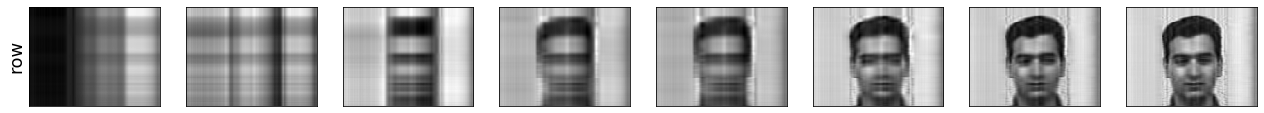

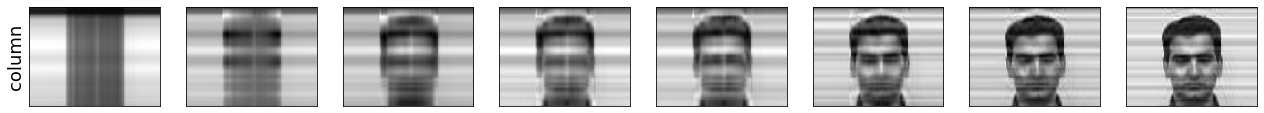

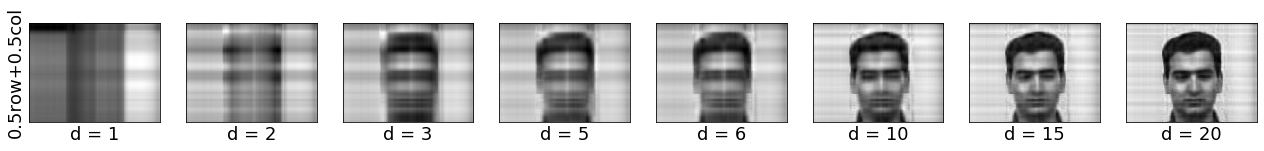

In [504]:
# reconstructed images
# row-image
A_tilde_k = {} 
k = [0, 1, 2, 4, 5,9,14, 19]
for i in k:
    V1 = np.matmul(A, v[:,0:(i+1)])
    A_tilde_k[i] = np.matmul(V1, v[:,0:(i+1)].T)
    
# column-image
B_tilde_k = {}
for i in k:
    V2 = np.matmul(B, v_B[:,0:(i+1)])
    B_tilde_k[i] = np.matmul(V2, v_B[:,0:(i+1)].T)
    
# row-column image
C_tilde_k = {}
for i in k:
    C_tilde_k[i] = 1/2*A_tilde_k[i][2, :,:] + 1/2*B_tilde_k[i][2,:,:].T

fig,ax = plt.subplots(1,8, figsize = (22,2))
for i, j in zip(range(8),k):
    ax[i].imshow(A_tilde_k[j][2,:,:], cmap = 'gray')
    ax[i].tick_params(axis = 'both', which = 'both', 
                      bottom = False, left = False,
                     labelbottom = False,
                     labelleft = False)
ax[0].set_ylabel('row', fontsize = '18')
# fig.savefig('Fig5_reconstruct_image_a.pdf', bbox_inches = 'tight')

fig,ax = plt.subplots(1,8, figsize = (22,2))
for i, j in zip(range(8),k):
    ax[i].imshow(B_tilde_k[j][2,:,:].T, cmap = 'gray')
    ax[i].tick_params(axis = 'both', which = 'both', 
                      bottom = False, left = False,
                     labelbottom = False,
                     labelleft = False)
ax[0].set_ylabel('column', fontsize = '18')    
# fig.savefig('Fig5_reconstruct_image_b.pdf', bbox_inches = 'tight')


fig,ax = plt.subplots(1,8, figsize = (22,2))
for i, j in zip(range(8),k):
    ax[i].imshow(C_tilde_k[j], cmap = 'gray')
    ax[i].tick_params(axis = 'both', which = 'both', 
                      bottom = False, left = False,
                     labelbottom = False,
                     labelleft = False)
    ax[i].set_xlabel('d = ' + str(j+1), fontsize = 18)
ax[0].set_ylabel('0.5row+0.5col', fontsize = '18')
# fig.savefig('Fig5_reconstruct_image_c.pdf', bbox_inches = 'tight');

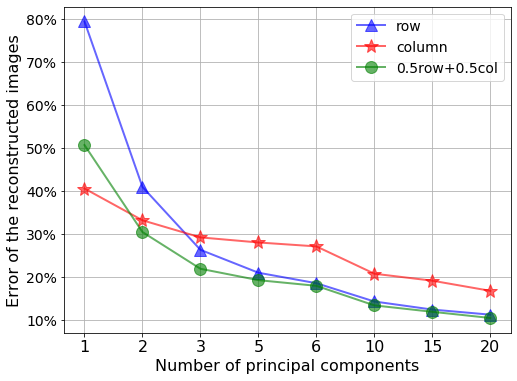

In [505]:
## plot the error against the number of subimages
import matplotlib.ticker as mtick

error_A_k = {}
error_B_k = {}
error_C_k = {}
k = [0, 1, 2, 4, 5, 9, 14, 19]

for i in k :
    error_A_k[i] = np.linalg.norm(A[2,:,:] - A_tilde_k[i][2,:,:], ord = 'fro')
    error_B_k[i] = np.linalg.norm(A[2,:,:] - B_tilde_k[i][2,:,:].T, ord = 'fro')
    error_C_k[i] = np.linalg.norm(A[2,:,:] - C_tilde_k[i], ord = 'fro')

fig, ax = plt.subplots(figsize = (8,6))
ax.plot(np.arange(8), [error_A_k[i]*100/np.linalg.norm(A[2,:,:], ord = 'fro') for i in k], 
        'b^-', markersize = 12, alpha = 0.6,linewidth = 2,
       label = 'row')
ax.plot(np.arange(8), [error_B_k[i]*100/np.linalg.norm(A[2,:,:], ord = 'fro') for i in k],
        'r*-',markersize = 14, alpha = 0.6,linewidth = 2,
       label = 'column')
ax.plot(np.arange(8), [error_C_k[i]*100/np.linalg.norm(A[2,:,:], ord = 'fro') for i in k], 
        'go-',markersize = 12, alpha = 0.6,linewidth = 2,
       label ='0.5row+0.5col')
ax.legend(fontsize = 14)
ax.tick_params(axis = 'both', which = 'major', labelsize = 14)
ax.set_ylabel("Error of the reconstructed images", fontsize = 16)
ax.set_xticks(np.arange(8))
ax.set_xticklabels([(i+1) for i in k], fontsize = 16)
ax.set_xlabel('Number of principal components', fontsize = 16)
ax.grid(True)


fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)

# fig.savefig('Fig6_Error.pdf', bbox_inches = 'tight')
